In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

In [2]:
listings = pd.read_csv('seattle/listings.csv')
Calendar = pd.read_csv('seattle/calendar.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
Calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
listings.shape[0], listings.shape[1]

(3818, 92)

In [8]:
Calendar.shape[0]

1393570

In [9]:
reviews.shape[0]

84849

In [10]:
Calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [11]:
Calendar = Calendar.dropna()

In [12]:
Calendar['date'] = pd.to_datetime(Calendar['date'])
Calendar[['price']] = Calendar[['price']].replace('[\$,]','',regex=True).astype(float)

In [13]:
df = Calendar.groupby(['date'])['price'].mean()

In [14]:
df.head()

date
2016-01-04    122.085879
2016-01-05    120.681307
2016-01-06    120.928258
2016-01-07    120.958896
2016-01-08    127.640853
Name: price, dtype: float64

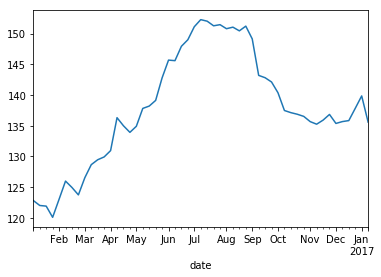

In [15]:
df.resample('W').mean().plot()

In [16]:
df = df.reset_index()

In [17]:
df.head()

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853


In [18]:
df['month'] = df['date'].dt.month

In [19]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

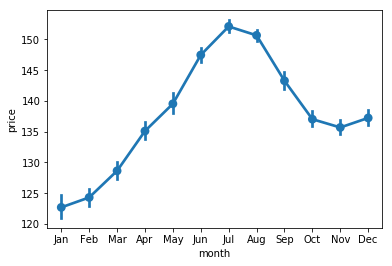

In [20]:
sb.pointplot(data = df, x = 'month', y = 'price');

In [21]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [22]:
listings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
neighbourhoods = listings[['id','neighbourhood_group_cleansed']]

In [24]:
neighbourhoods.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [25]:
neighbourhoods = neighbourhoods.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})

In [26]:
Calendar = pd.merge(Calendar, neighbourhoods, on=['listing_id', 'listing_id'])

In [27]:
Calendar.head()

,listing_id,date,available,price,neighbourhood
0,241032,2016-01-04,t,85.0,Queen Anne
1,241032,2016-01-05,t,85.0,Queen Anne
2,241032,2016-01-13,t,85.0,Queen Anne
3,241032,2016-01-14,t,85.0,Queen Anne
4,241032,2016-01-18,t,85.0,Queen Anne


In [28]:
Calendar.dtypes

listing_id                int64
date             datetime64[ns]
available                object
price                   float64
neighbourhood            object
dtype: object

In [29]:
nb_price = round(Calendar.groupby('neighbourhood')['price'].mean(),2)
nb_price = pd.DataFrame(nb_price).reset_index()
nb_price

,neighbourhood,price
0,Ballard,125.91
1,Beacon Hill,100.67
2,Capitol Hill,134.67
3,Cascade,154.03
4,Central Area,134.88
5,Delridge,90.93
6,Downtown,187.34
7,Interbay,118.42
8,Lake City,94.52
9,Magnolia,198.69


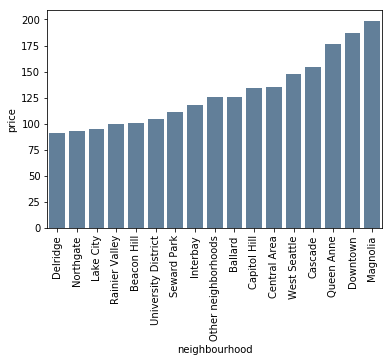

In [30]:
sb.barplot('neighbourhood','price',data=nb_price.sort_values(['price']),saturation=.5,color="steelblue")
plt.xticks(rotation=90);